In [1]:
# Setup Imports
import numpy as np
import matplotlib.pyplot as plt

# Loading Results from OL1.py Application outputs
results = [{
        "title":"WDBC - UnStandardized",
        "limits": [0.5, 1.0],
        "adam": np.loadtxt("wdbc-unstandardized-adam-results.txt"),
        "rmsprop": np.loadtxt("wdbc-unstandardized-rmsprop-results.txt"),
        "sgd": np.loadtxt("wdbc-unstandardized-sgd-results.txt"),
    },{
        "title":"WDBC - Standardized",
        "limits": [0.5, 1.0],
        "adam": np.loadtxt("wdbc-standardized-adam-results.txt"),
        "rmsprop": np.loadtxt("wdbc-standardized-rmsprop-results.txt"),
        "sgd": np.loadtxt("wdbc-standardized-sgd-results.txt"),
    },{
        "title":"IRIS - UnStandardized",
        "limits": [0.2, 1.0], # On IRIS the limit is lower than on WDBC
        "adam": np.loadtxt("iris-unstandardized-adam-results.txt"),
        "rmsprop": np.loadtxt("iris-unstandardized-rmsprop-results.txt"),
        "sgd": np.loadtxt("iris-unstandardized-sgd-results.txt"),
    },{
        "title":"IRIS - Standardized",
        "limits": [0.2, 1.0], # On IRIS the limit is lower than on WDBC
        "adam": np.loadtxt("iris-standardized-adam-results.txt"),
        "rmsprop": np.loadtxt("iris-standardized-rmsprop-results.txt"),
        "sgd": np.loadtxt("iris-standardized-sgd-results.txt"),
    }]


Matplotlib is building the font cache; this may take a moment.


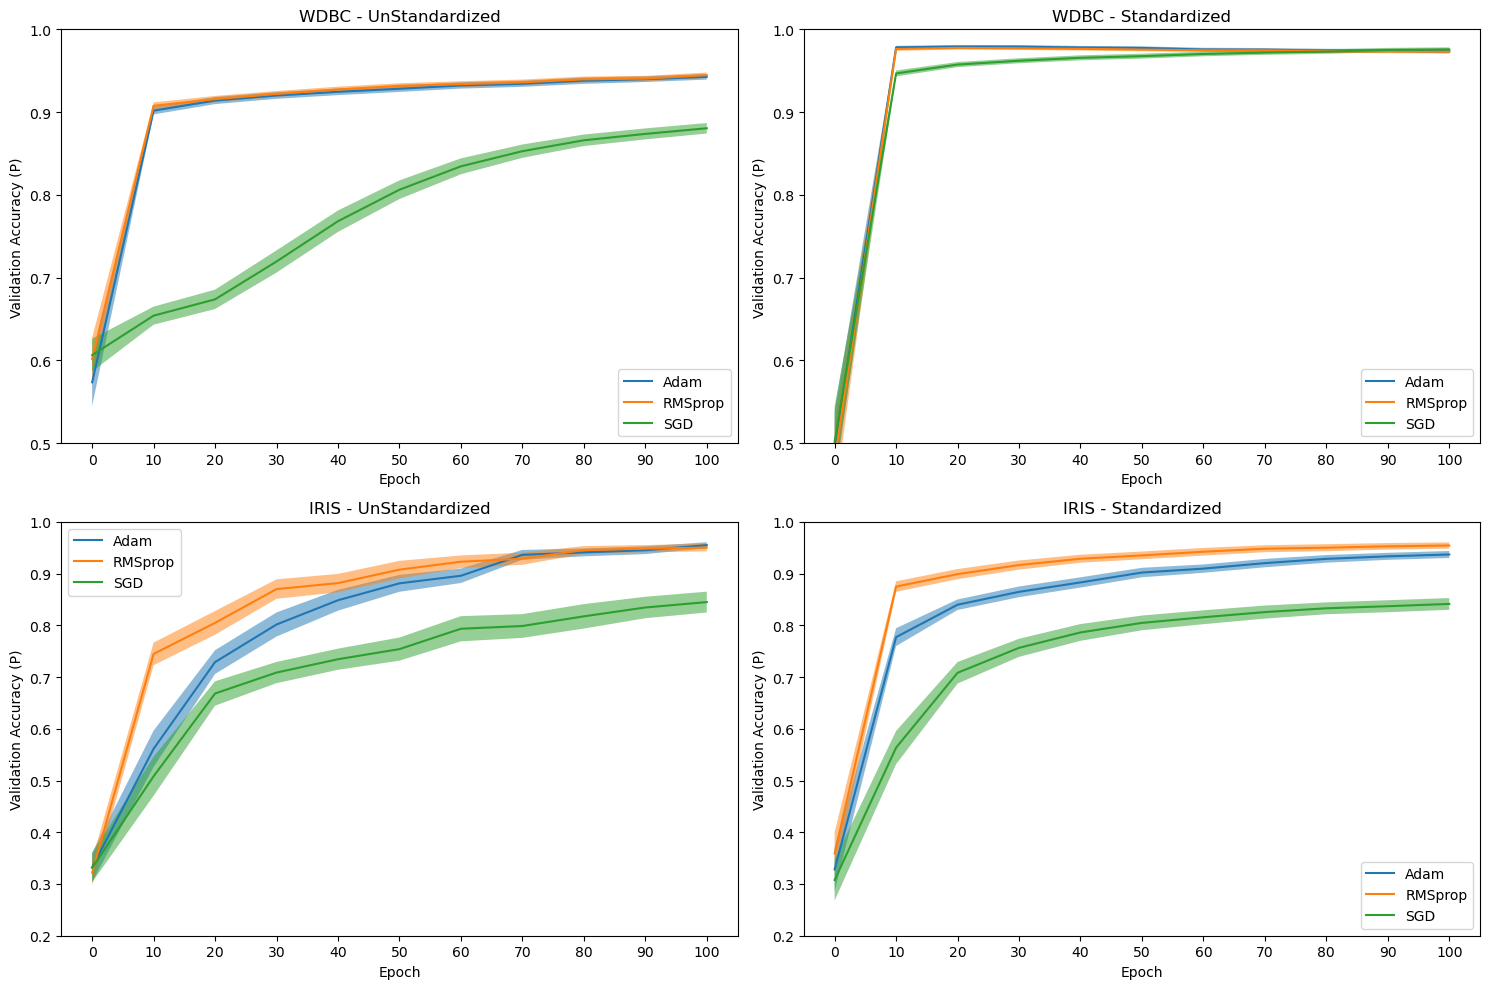

In [2]:
# Create a 2x2 grid for the Plots (subplots)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Default Values for all Plots
for i, axis in enumerate(axes.ravel()):

    # Setup Data Layers for Plots
    axis.set_title(results[i]["title"])

    # Setup Adam - Optimized
    data = results[i]["adam"]
    axis.plot(np.arange(0, data.shape[1]), np.mean(data, 0),label='Adam')
    axis.fill_between(np.arange(0, data.shape[1]), np.mean(data, 0)-(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), np.mean(data, 0)+(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), alpha=0.5)

    # Setup RMSprop - Optimized
    data = results[i]["rmsprop"]
    axis.plot(np.arange(0, data.shape[1]), np.mean(data, 0),label='RMSprop')
    axis.fill_between(np.arange(0, data.shape[1]), np.mean(data, 0)-(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), np.mean(data, 0)+(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), alpha=0.5)

    # Setup SGD - Optimized
    data = results[i]["sgd"]
    axis.plot(np.arange(0, data.shape[1]), np.mean(data, 0),label='SGD')
    axis.fill_between(np.arange(0, data.shape[1]), np.mean(data, 0)-(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), np.mean(data, 0)+(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), alpha=0.5)

    # General Setting and UI configs that are the same on each Plot
    axis.set_ylabel('Validation Accuracy (P)')
    axis.set_ylim(results[i]["limits"])
    axis.set_xlabel('Epoch')
    axis.set_xticks(ticks=np.arange(0, 11), labels=np.arange(0, 110, 10))
    axis.legend() 

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Ansers to OL1 Questions:

## Answer 1
Looking over the plots from above, it seems that the SGD optimizer benefited the most from standardizing the input values. This was particularly true for the WDBC dataset.

## Answer 2
The main advantages of helping the SGD optimizer by standardization are that the convergence is faster because the input features (especially in the WDBC dataset) have different scales on the main dataset. Using standardization made the inputs all the same scale, thus making adjustments during the learning/optimization process helped to not over- and under-correct on epochs, and hence, get the best prediction result in a smoother and probably faster way.

## Answer 3
A few things come to mind:
1. Work on a more detailed learning rate (lr) for the different optimizers (all of them used the same for the most part). Maybe adjust it based on whether I did or did not use standardization of the input data. _(this is Hyperparameter adjustment)_
2. In my case, I should try and clean up the input features better, especially on the multiclass classification model (IRIS). It seems like I had to adjust the `y_pred` to be a different datatype when processing the training and validation steps in the model.
3. Determine how many learning iterations (epochs) I really need to train the models. For example, I believe that after about ~50-75 epochs, the prediction rates did not get materially better.
4. Look at different standardization for the data. It seems that on the WDBC data, standardization helped immensely; however, on the IRIS data, it had less of an impact. I, therefore, think I could look into **Normalization** rather than standardization techniques.

## Answer 4
Since I listed a few details above, I would have a few expected answers:
1. I would see less of a "spread" between the epochs' predictions. Meaning I think the learning would be more uniform as I run my "OL1.py" app 100 times.
2. It would make the code a bit cleaner and easier to read if I clean it up before loading it into the trainers.
3. I think it would improve the processing time for OL1.py and therefore use fewer resources.
4. Might help on the IRIS with the SGD optimizer being more in line with RMSprop and ADAM optimizers.

## Answer 5
As stated above, since I listed 4x, I will try to list my processes related to it:
1. I would compare the prediction curves, like the above plots, to each other to see if one moves quicker to a better validation rate of 1.0 in comparison to the others.
2. Since I suggested a simple code change, it would just be more readable...
3. I would add some date and timestamp logging to see if I can materially speed up the process. I would probably use the **logging** module (https://docs.python.org/3/library/logging.html).
4. I could try Min and Max - Normalization instead of standardization like I previously did. This would be something like this: `x_new = (x - min) / (max - min)`. I would have to test and see if it performs better than the standardization I used.

## Answer 6
Overall, I had a hard time running the `OL1.py` efficiently. I was able to log into the clusters, but I feel like it didn't really work out for me in parallelization. It took a long time to run, and overall, I think it was as fast simply letting it run on `biosim` overnight rather than using the `sbatch` process. I could really use more help in testing or understanding how to use it.

## Answer 7
From the above mentioned, I would really like to have a "prebuilt" application to test locally, on `biosim`, and in the cluster to gain some more knowledge on how to use these resources.

In addition, I think some input on **Normalization** that I mentioned above might be interesting as well.
